In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.nn.modules.activation import ReLU
import torch.optim as optim
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def get_loader(batch_size, mode):
    dataset = datasets.MNIST(root="MNIST", train=mode, download=True, transform=transforms.ToTensor())
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return loader


train_loader = get_loader(128, True)
test_loader = get_loader(128, False)

In [ ]:
for X, y in train_loader:
  print(X.size(), y.size())
  break

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [ ]:
def create_model(l1=256, l2=128, l3=64):
    model = nn.Sequential(
        nn.Linear(28 * 28 * 1, l1),
        nn.ReLU(),
        nn.Linear(l1, l2),
        nn.ReLU(),
        nn.Linear(l2, l3),
        nn.ReLU(),
        nn.Linear(l3, 10),
        nn.LogSoftmax(dim=1)
    )
    
    return model


model = create_model()

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

In [ ]:
def accuracy(model, valid):
    model.eval()

    total = 0
    correct = 0
    for X, y in valid:
      X = X.view(-1, 784)
      pred = model(X)
      pred = pred.argmax(dim=1)
      total += pred.shape[0]
      correct += (pred == y).sum().item()
    
    model.train()

    return correct / total



In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.NLLLoss()

In [ ]:
def training(epoch=20, acc=False):
    train_losses = []

    for epoch in tqdm(range(epoch)):
        for X, y in train_loader:
            X = X.view(-1, 784)
            optimizer.zero_grad()

            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            
            train_losses.append(loss.item())
            optimizer.step()
        
        if acc:
          print(f"\n{epoch + 1} epoch: \n\ttrain-acc={accuracy(model, train_loader)}, \n\ttest-acc={accuracy(model, test_loader)}")
    

    plt.plot(train_losses)
    plt.show()

    return model

  7%|▋         | 1/15 [00:22<05:16, 22.63s/it]


1 epoch: 
	train-acc=0.9534666666666667, 
	test-acc=0.9521


 13%|█▎        | 2/15 [00:42<04:33, 21.03s/it]


2 epoch: 
	train-acc=0.9698, 
	test-acc=0.9646


 20%|██        | 3/15 [01:03<04:09, 20.83s/it]


3 epoch: 
	train-acc=0.9812833333333333, 
	test-acc=0.9739


 27%|██▋       | 4/15 [01:23<03:48, 20.75s/it]


4 epoch: 
	train-acc=0.9828666666666667, 
	test-acc=0.9739


 33%|███▎      | 5/15 [01:44<03:27, 20.76s/it]


5 epoch: 
	train-acc=0.9904166666666666, 
	test-acc=0.9771


 40%|████      | 6/15 [02:04<03:05, 20.61s/it]


6 epoch: 
	train-acc=0.9843166666666666, 
	test-acc=0.9719


 47%|████▋     | 7/15 [02:25<02:43, 20.48s/it]


7 epoch: 
	train-acc=0.9885166666666667, 
	test-acc=0.9755


 53%|█████▎    | 8/15 [02:45<02:22, 20.40s/it]


8 epoch: 
	train-acc=0.9931166666666666, 
	test-acc=0.9778


 60%|██████    | 9/15 [03:05<02:02, 20.35s/it]


9 epoch: 
	train-acc=0.9942333333333333, 
	test-acc=0.9773


 67%|██████▋   | 10/15 [03:25<01:41, 20.24s/it]


10 epoch: 
	train-acc=0.9937666666666667, 
	test-acc=0.9783


 73%|███████▎  | 11/15 [03:45<01:20, 20.14s/it]


11 epoch: 
	train-acc=0.9971166666666667, 
	test-acc=0.9801


 80%|████████  | 12/15 [04:05<01:00, 20.26s/it]


12 epoch: 
	train-acc=0.9960666666666667, 
	test-acc=0.9794


 87%|████████▋ | 13/15 [04:26<00:40, 20.40s/it]


13 epoch: 
	train-acc=0.9967666666666667, 
	test-acc=0.9785


 93%|█████████▎| 14/15 [04:47<00:20, 20.46s/it]


14 epoch: 
	train-acc=0.9985833333333334, 
	test-acc=0.9816


100%|██████████| 15/15 [05:08<00:00, 20.56s/it]


15 epoch: 
	train-acc=0.9978833333333333, 
	test-acc=0.979


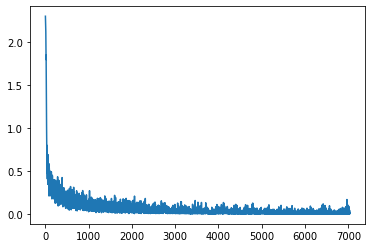

In [ ]:
model = training(epoch=15, acc=True)

In [ ]:
print(f"Overall accuracy={accuracy(model, test_loader)}")

Overall accuracy=0.979


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        
        self.decode = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            # а теперь наоборот - из Х-мерного в картинку
            nn.Sigmoid()
            # картинки -- это тензоры со значениями от 0 до 1
            # нет особого смысла выводить что-то не из этого промежутка
        )
    
    def forward(self, x):
        return self.decode(self.encode(x))

model = Autoencoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
for epoch in tqdm(range(15)):
    train_loss = 0

    for data, _ in train_loader:
        data = data.view(-1, 784)
        
        optimizer.zero_grad()
        
        reconstructed = model(data)
        loss = criterion(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer.step()

    print('\tepoch %d, loss %f' % (epoch + 1, train_loss / len(train_loader)))


  7%|▋         | 1/15 [00:19<04:31, 19.40s/it]

	epoch 1, loss 0.043397


 13%|█▎        | 2/15 [00:40<04:21, 20.11s/it]

	epoch 2, loss 0.017963


 20%|██        | 3/15 [01:02<04:16, 21.39s/it]

	epoch 3, loss 0.012685


 27%|██▋       | 4/15 [01:24<03:58, 21.64s/it]

	epoch 4, loss 0.010189


 33%|███▎      | 5/15 [01:46<03:37, 21.75s/it]

	epoch 5, loss 0.008731


 40%|████      | 6/15 [02:08<03:16, 21.78s/it]

	epoch 6, loss 0.007831


 47%|████▋     | 7/15 [02:30<02:54, 21.78s/it]

	epoch 7, loss 0.007157


 53%|█████▎    | 8/15 [02:52<02:32, 21.79s/it]

	epoch 8, loss 0.006591


 60%|██████    | 9/15 [03:14<02:10, 21.77s/it]

	epoch 9, loss 0.006126


 67%|██████▋   | 10/15 [03:35<01:48, 21.75s/it]

	epoch 10, loss 0.005714


 73%|███████▎  | 11/15 [03:57<01:27, 21.85s/it]

	epoch 11, loss 0.005415


 80%|████████  | 12/15 [04:20<01:06, 22.00s/it]

	epoch 12, loss 0.005150


 87%|████████▋ | 13/15 [04:42<00:44, 22.13s/it]

	epoch 13, loss 0.004901


 93%|█████████▎| 14/15 [05:05<00:22, 22.22s/it]

	epoch 14, loss 0.004717


100%|██████████| 15/15 [05:26<00:00, 21.80s/it]

	epoch 15, loss 0.004517


In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import numpy

In [ ]:
def get(x):
    return train_loader.dataset[x][0].view(1, 784)

def imshow(img):
    pic = img.numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(inputs, steps, delay):
    # перегоняем в латентное пространство все картинки на входе
    latent = [model.encode(get(k)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in numpy.linspace(0, 1, steps):
            # получаем проинтерполированную точку
            c = a*(1-t)+b*t
            # ...и декодируем её в изображение
            morphed = model.decode(c).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    
    ani = animation.ArtistAnimation(fig, images, interval=delay)

    display(HTML(ani.to_html5_video()))

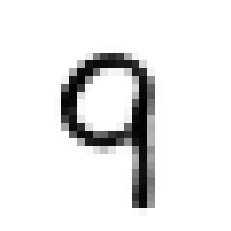

In [ ]:
morph(numpy.random.randint(0, len(train_loader.dataset), 30), 20, 30)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
        
        self.decode = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            # а теперь наоборот - из Х-мерного в картинку
            nn.Sigmoid()
            # картинки -- это тензоры со значениями от 0 до 1
            # нет особого смысла выводить что-то не из этого промежутка
        )
    
    def forward(self, x):
        return self.decode(self.encode(x))

model = Autoencoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
for epoch in tqdm(range(30)):
    train_loss = 0

    for data, _ in train_loader:
        data = data.view(-1, 784)
        
        optimizer.zero_grad()
        
        reconstructed = model(data)
        loss = criterion(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer.step()

    print('\tepoch %d, loss %f' % (epoch + 1, train_loss / len(train_loader)))

  3%|▎         | 1/30 [00:19<09:21, 19.35s/it]

	epoch 1, loss 0.056180


  7%|▋         | 2/30 [00:42<10:04, 21.59s/it]

	epoch 2, loss 0.042961


 10%|█         | 3/30 [01:08<10:37, 23.60s/it]

	epoch 3, loss 0.040758


 13%|█▎        | 4/30 [01:35<10:43, 24.76s/it]

	epoch 4, loss 0.039579


 17%|█▋        | 5/30 [02:00<10:23, 24.95s/it]

	epoch 5, loss 0.038467


 20%|██        | 6/30 [02:25<10:02, 25.09s/it]

	epoch 6, loss 0.037933


 23%|██▎       | 7/30 [02:50<09:36, 25.04s/it]

	epoch 7, loss 0.037465


 27%|██▋       | 8/30 [03:15<09:11, 25.05s/it]

	epoch 8, loss 0.036965


 30%|███       | 9/30 [03:40<08:46, 25.06s/it]

	epoch 9, loss 0.036582


 33%|███▎      | 10/30 [04:05<08:21, 25.08s/it]

	epoch 10, loss 0.036333


 37%|███▋      | 11/30 [04:30<07:55, 25.04s/it]

	epoch 11, loss 0.036511


 40%|████      | 12/30 [04:55<07:30, 25.02s/it]

	epoch 12, loss 0.036622


 43%|████▎     | 13/30 [05:20<07:05, 25.04s/it]

	epoch 13, loss 0.036366


 47%|████▋     | 14/30 [05:45<06:39, 25.00s/it]

	epoch 14, loss 0.035964


 50%|█████     | 15/30 [06:10<06:14, 24.93s/it]

	epoch 15, loss 0.035680


 53%|█████▎    | 16/30 [06:35<05:48, 24.90s/it]

	epoch 16, loss 0.035589


 57%|█████▋    | 17/30 [07:00<05:23, 24.91s/it]

	epoch 17, loss 0.035183


 60%|██████    | 18/30 [07:25<04:59, 24.96s/it]

	epoch 18, loss 0.035164


 63%|██████▎   | 19/30 [07:50<04:35, 25.04s/it]

	epoch 19, loss 0.034912


 67%|██████▋   | 20/30 [08:15<04:10, 25.02s/it]

	epoch 20, loss 0.034705


 70%|███████   | 21/30 [08:40<03:44, 24.94s/it]

	epoch 21, loss 0.034617


 73%|███████▎  | 22/30 [09:04<03:18, 24.82s/it]

	epoch 22, loss 0.034498


 77%|███████▋  | 23/30 [09:29<02:52, 24.63s/it]

	epoch 23, loss 0.034376


 80%|████████  | 24/30 [09:53<02:27, 24.56s/it]

	epoch 24, loss 0.034231


 83%|████████▎ | 25/30 [10:17<02:02, 24.49s/it]

	epoch 25, loss 0.034408


 87%|████████▋ | 26/30 [10:42<01:37, 24.41s/it]

	epoch 26, loss 0.034029


 90%|█████████ | 27/30 [11:06<01:13, 24.36s/it]

	epoch 27, loss 0.034012


 93%|█████████▎| 28/30 [11:30<00:48, 24.30s/it]

	epoch 28, loss 0.033976


 97%|█████████▋| 29/30 [11:54<00:24, 24.27s/it]

	epoch 29, loss 0.033707


100%|██████████| 30/30 [12:18<00:00, 24.63s/it]

	epoch 30, loss 0.033548


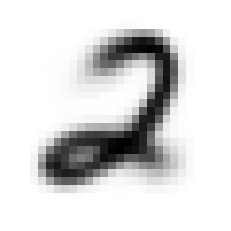

In [ ]:
morph(numpy.random.randint(0, len(train_loader.dataset), 30), 20, 30)

In [ ]:
x_img = []
y_img = []
labels = []
for X, y in train_loader:
  X = X.view(-1, 784)
  latent_batch = model.encode(X)
  
  for image, label in zip(latent_batch, y):
    x_img.append(image[0].detach().numpy())
    y_img.append(image[1].detach().numpy())
    labels.append(label.detach().numpy())

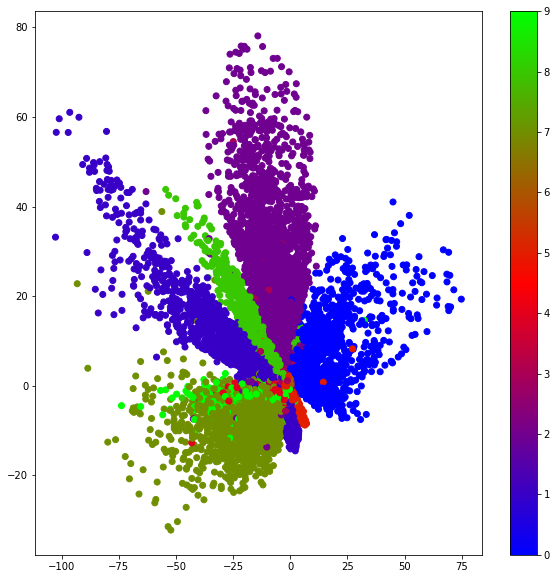

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x_img, y_img, c=labels, cmap="brg")
plt.colorbar()
plt.show()